# Credit Card Fraud Detection
Build a machine learning model to identify fraudulent credit card transactions.  
Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.  
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.  
Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.  

## Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [47]:
#We begin with importing all the necessary libraries
#For Data Analysis
import numpy as np
import pandas as pd
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset from csv into a python pandas dataframe
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\CodSoft\Creditcard-Dataset.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [3]:
data.shape

(284807, 31)

In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Amount', ylabel='Density'>

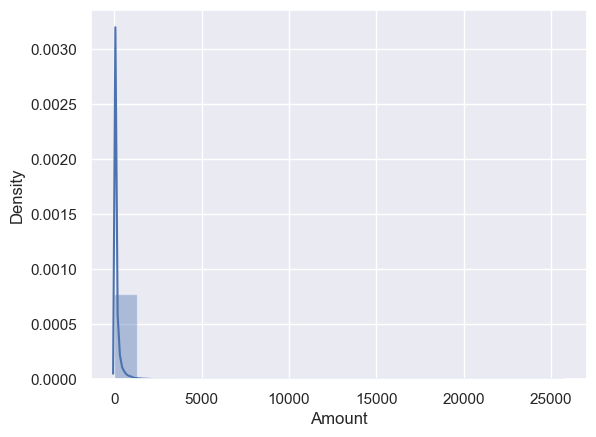

In [12]:
sns.set()
sns.distplot(data["Amount"], bins = 20)

In [15]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

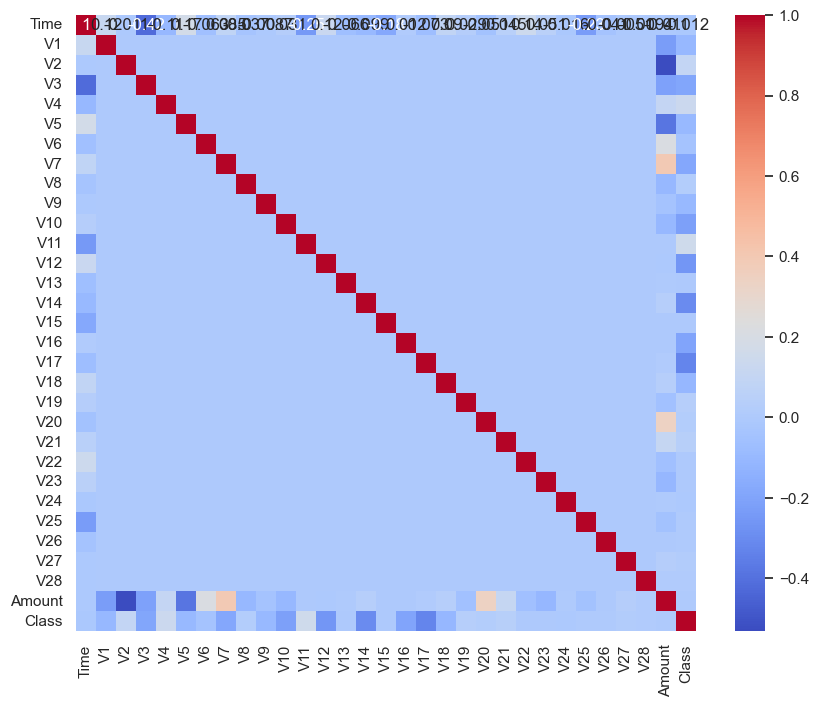

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [19]:
cov = data.cov()
cov

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-125860.970747,-24.300717
V1,1.091960e+04,3.836489e+00,-2.967851e-16,-1.686106e-15,-7.791855e-16,8.238929e-16,3.193383e-16,3.321119e-16,-1.245419e-16,1.021883e-16,...,-1.429039e-16,1.053816e-16,1.852162e-16,-5.428751e-17,-2.043765e-16,-1.217477e-16,7.641666e-17,2.554707e-16,-111.556566,-0.008244
V2,-8.307031e+02,-2.967851e-16,2.726820e+00,-6.386766e-17,-3.832060e-16,2.426971e-16,8.462466e-16,-2.522773e-16,-7.344781e-17,-1.844179e-16,...,1.149618e-16,2.027798e-16,1.245419e-16,-9.101142e-17,1.149618e-16,2.043765e-16,-3.355048e-16,-2.299236e-16,-219.485433,0.006260
V3,-3.021425e+04,-1.686106e-15,-6.386766e-17,2.299029e+00,-4.917810e-16,-1.213486e-15,2.874045e-15,4.726207e-16,-1.532824e-16,2.107633e-16,...,-1.836195e-16,-2.682442e-16,-6.845815e-17,1.756361e-17,8.941473e-17,-1.660559e-16,3.113549e-16,3.800126e-16,-79.975549,-0.012150
V4,-7.077378e+03,-7.791855e-16,-3.832060e-16,-4.917810e-16,2.004684e+00,-3.602136e-15,-7.983458e-16,-7.983458e-17,1.069783e-15,9.644017e-16,...,-6.865774e-17,2.426971e-16,1.852162e-16,1.374153e-16,4.837976e-16,-2.802194e-16,-5.907759e-17,-7.135216e-18,34.964556,0.007846
V5,1.134407e+04,8.238929e-16,2.426971e-16,-1.213486e-15,-3.602136e-15,1.905081e+00,1.104911e-15,-1.596692e-17,7.855723e-16,7.185112e-16,...,-6.706105e-17,3.193383e-18,8.941473e-17,-8.047326e-16,-8.622135e-17,2.107633e-16,2.426971e-16,-8.143127e-17,-133.380790,-0.005444
V6,-3.986868e+03,3.193383e-16,8.462466e-16,2.874045e-15,-7.983458e-16,1.104911e-15,1.774946e+00,-8.781804e-17,-5.875825e-16,-1.341221e-16,...,-8.682011e-17,-1.085750e-16,1.756361e-17,-8.530325e-16,3.576589e-16,-1.652576e-16,-6.706105e-17,1.905053e-16,71.970931,-0.002415
V7,4.976739e+03,3.321119e-16,-2.522773e-16,4.726207e-16,-7.983458e-17,-1.596692e-17,-8.781804e-17,1.530401e+00,-1.916030e-17,-6.386766e-18,...,6.386766e-18,-5.907759e-16,-2.139567e-16,-7.334802e-18,1.277353e-17,-4.614439e-16,-9.260811e-17,9.580150e-18,122.936845,-0.009620
V8,-2.095683e+03,-1.245419e-16,-7.344781e-17,-1.532824e-16,1.069783e-15,7.855723e-16,-5.875825e-16,-1.916030e-17,1.426479e+00,5.340933e-16,...,5.428751e-17,1.796278e-17,1.405089e-16,-1.564758e-16,-1.037850e-16,1.596692e-18,1.596692e-16,-2.227385e-16,-30.792991,0.000986
V9,-4.518322e+02,1.021883e-16,-1.844179e-16,2.107633e-16,9.644017e-16,7.185112e-16,-1.341221e-16,-6.386766e-18,5.340933e-16,1.206992e+00,...,1.963931e-16,-1.181552e-16,-7.025443e-17,-1.916030e-16,1.500890e-16,-7.664120e-17,-7.264947e-17,2.945896e-16,-12.158248,-0.004459


# Data Preparation

In [22]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [23]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Model Building

In [26]:
legit_sample = legit.sample(n = 492)

In [28]:
data2 = pd.concat([legit_sample, fraud], axis = 0)
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36842,38707.0,0.515713,-1.460666,-0.009783,0.827785,-1.039444,-0.249456,0.208041,-0.160090,-1.125711,...,-0.272440,-1.219883,-0.185416,0.015399,0.108798,-0.558283,-0.018675,0.098065,409.87,0
271574,164637.0,-0.746547,1.191493,-1.311019,0.048698,0.089388,-1.587889,0.209464,0.537831,-0.249991,...,0.410423,0.892748,-0.125853,-0.067959,-0.388845,-0.167833,-0.231535,-0.051752,15.67,0
180628,124625.0,-1.269395,1.499836,0.570939,3.949202,1.446803,1.244737,1.052662,-0.615815,-0.677955,...,0.042142,1.432295,-0.078947,0.311503,-0.433649,0.425450,-0.797040,-0.811856,10.59,0
27398,34536.0,-0.109674,0.765794,0.974217,-0.897318,0.378171,-0.514085,0.683697,-0.129381,-0.344937,...,-0.219714,-0.644315,-0.170248,-0.526729,-0.125967,0.865294,-0.059237,0.000761,1.00,0
90158,62885.0,0.871230,-0.130748,1.389425,2.402385,-0.056120,2.480719,-1.063504,0.977522,0.020584,...,0.078068,0.406038,0.164034,-1.063169,-0.093890,0.071085,0.100105,0.010183,12.64,0


In [30]:
X, y = data2.drop("Class", axis = 1), data2["Class"]

In [31]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [35]:
X_train_predicted = model.predict(X_train)
print("Accuracy Score on Train data: ", accuracy_score(X_train_predicted, y_train))

Accuracy Score on Train data:  0.9351969504447268


In [36]:
X_test_predicted=model.predict(X_test)
print("Accuracy Score on Test data: ", accuracy_score(X_test_predicted,y_test))

Accuracy Score on Test data:  0.9746192893401016


In [38]:
print(classification_report(y_test,X_test_predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.99      0.96      0.97        98

    accuracy                           0.97       197
   macro avg       0.98      0.97      0.97       197
weighted avg       0.98      0.97      0.97       197



In [39]:
y_test_prob=model.predict_proba(X_test)
y_test_prob[:10]

array([[4.59474693e-07, 9.99999541e-01],
       [7.53695025e-08, 9.99999925e-01],
       [7.45962138e-01, 2.54037862e-01],
       [1.68481569e-06, 9.99998315e-01],
       [9.64835938e-01, 3.51640622e-02],
       [9.78831155e-07, 9.99999021e-01],
       [6.03441741e-11, 1.00000000e+00],
       [1.21912885e-02, 9.87808711e-01],
       [9.73175066e-01, 2.68249340e-02],
       [9.66823037e-01, 3.31769629e-02]])

In [42]:
y_test_prob_positve=y_test_prob[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob_positve)
fpr

array([0.        , 0.        , 0.        , 0.01010101, 0.01010101,
       0.04040404, 0.04040404, 0.15151515, 0.15151515, 0.45454545,
       0.45454545, 1.        ])

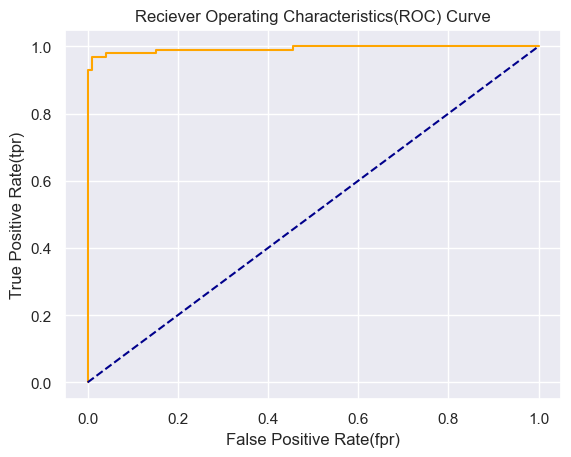

In [43]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Reciever Operating Characteristics(ROC) Curve")
    
plot_roc_curve(fpr,tpr)

In [44]:
roc_auc_score(y_test,y_test_prob_positve)

0.9929911358482786

<Axes: >

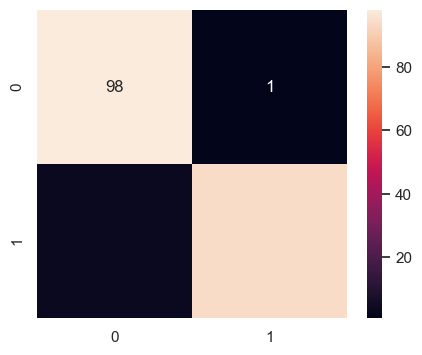

In [52]:
cm = confusion_matrix(y_test, X_test_predicted, labels = model.classes_)
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, xticklabels = model.classes_, yticklabels = model.classes_)

In [56]:
print("Accuracy Score:", model.score(X_test, y_test))

Accuracy Score: 0.9746192893401016


# Thank You!!!